In [206]:
# Dependencies
import  datapackage
import  datetime            as      dt
import  json
import  matplotlib.pyplot   as      plt
import  numpy               as      np
import  os
import  pandas              as      pd
import  requests
import  time

from    matplotlib.dates    import  YearLocator, DateFormatter
from    dotenv              import  load_dotenv
from    scipy.stats         import  linregress

In [207]:
# Set environment variables from the .env in the local environment
load_dotenv()

fred_api_key    = os.getenv("FRED_API_KEY")
fred_url        = "https://api.stlouisfed.org/fred/"

In [208]:
# Retrieve dataset  : Median Sales Price of Houses Sold in US (Monthly)
# Source            : U.S. Census Bureau and U.S. Department of Housing and Urban Development

fred_series     = "MSPUS" 
#fred_filter_qry =  f"series?series_id={fred_series}&api_key={fred_api_key}&file_type=json"
fred_filter_qry =  f"series/observations?series_id={fred_series}&frequency=q&api_key={fred_api_key}&file_type=json"
query_url = fred_url + fred_filter_qry

response = requests.get(query_url).json()
#print(json.dumps(response, indent=4))

median_sales_price_housing_quarterly_df = \
    pd.json_normalize(response["observations"])

median_sales_price_housing_quarterly_df = \
    median_sales_price_housing_quarterly_df.rename(
        columns={
              "date"    : "Date"
            , "value"   : "Median Sales Price of Houses"
        }
    )

median_sales_price_housing_quarterly_df = \
    median_sales_price_housing_quarterly_df.drop(
        columns={"realtime_start", "realtime_end"}
    )

display(median_sales_price_housing_quarterly_df.head())

,Date,Median Sales Price of Houses
0,1963-01-01,17800
1,1963-04-01,18000
2,1963-07-01,17900
3,1963-10-01,18500
4,1964-01-01,18500


In [209]:
# Retrieve dataset  : Median Household Income in US (Monthly)
# Source            : U.S. Census Bureau

fred_series     = "MEHOINUSA646N" 
#fred_filter_qry =  f"series?series_id={fred_series}&api_key={fred_api_key}&file_type=json"
fred_filter_qry =  f"series/observations?series_id={fred_series}&frequency=a&api_key={fred_api_key}&file_type=json"
query_url = fred_url + fred_filter_qry

response = requests.get(query_url).json()
#print(json.dumps(response, indent=4))

median_household_income_annually_df = \
    pd.json_normalize(response["observations"])

median_household_income_annually_df = \
    median_household_income_annually_df.rename(
        columns={
              "date"    : "Date"
            , "value"   : "Median Household Income"
        }
    )

median_household_income_annually_df = \
    median_household_income_annually_df.drop(
        columns={"realtime_start", "realtime_end"}
    )

display(median_household_income_annually_df.tail())

,Date,Median Household Income
34,2018-01-01,63180
35,2019-01-01,68700
36,2020-01-01,68010
37,2021-01-01,70780
38,2022-01-01,74580


In [210]:
# Retrieve dataset  : Average Hourly Earnings of All Employees (Monthly)
# Source            : U.S. Bureau of Labor Statistics

fred_series     = "CES0500000003" 
#fred_filter_qry =  f"series?series_id={fred_series}&api_key={fred_api_key}&file_type=json"
fred_filter_qry =  f"series/observations?series_id={fred_series}&frequency=m&api_key={fred_api_key}&file_type=json"
query_url = fred_url + fred_filter_qry

response = requests.get(query_url).json()
#print(json.dumps(response, indent=4))

avg_hourly_earnings_private_employees_monthly_df = \
    pd.json_normalize(response["observations"])

avg_hourly_earnings_private_employees_monthly_df = \
    avg_hourly_earnings_private_employees_monthly_df.rename(
        columns={
              "date"    : "Date"
            , "value"   : "Average Hourly Earnings"
        }
    )

avg_hourly_earnings_private_employees_monthly_df = \
    avg_hourly_earnings_private_employees_monthly_df.drop(
        columns={"realtime_start", "realtime_end"}
    )

display(avg_hourly_earnings_private_employees_monthly_df.tail())

,Date,Average Hourly Earnings
209,2023-08-01,33.82
210,2023-09-01,33.91
211,2023-10-01,34.00
212,2023-11-01,34.12
213,2023-12-01,34.27


In [211]:
# Retrieve dataset  : Personal Invcome (Monthly)
# Source            : U.S. Bureau of Economic Analysis

fred_series     = "PI" 
#fred_filter_qry =  f"series?series_id={fred_series}&api_key={fred_api_key}&file_type=json"
fred_filter_qry =  f"series/observations?series_id={fred_series}&frequency=m&api_key={fred_api_key}&file_type=json"
query_url = fred_url + fred_filter_qry

response = requests.get(query_url).json()
#print(json.dumps(response, indent=4))

personal_income_monthly_df = pd.json_normalize(response["observations"])

personal_income_monthly_df = \
    personal_income_monthly_df.rename(
        columns={
              "date"    : "Date"
            , "value"   : "Personal Income"
        }
    )

personal_income_monthly_df = \
    personal_income_monthly_df.drop(
        columns={"realtime_start", "realtime_end"}
    )

display(personal_income_monthly_df.tail())

,Date,Personal Income
930,2023-07-01,22972.4
931,2023-08-01,23071.7
932,2023-09-01,23148.5
933,2023-10-01,23207.8
934,2023-11-01,23289.4


In [212]:
# Retrieve dataset  : Rate of Home Ownership in the US (Quarterly)
# Source            : U.S. Census Bureau

fred_series     = "RHORUSQ156N" 
fred_filter_qry =  f"series/observations?series_id={fred_series}&frequency=q&api_key={fred_api_key}&file_type=json"
query_url = fred_url + fred_filter_qry

response = requests.get(query_url).json()
#print(json.dumps(response, indent=4))

rate_of_home_ownership_quarterly_df = pd.json_normalize(response["observations"])

rate_of_home_ownership_quarterly_df = \
    rate_of_home_ownership_quarterly_df.rename(
        columns={
              "date"    : "Date"
            , "value"   : "Rate of Home Ownership"
        }
    )

rate_of_home_ownership_quarterly_df = \
    rate_of_home_ownership_quarterly_df.drop(
        columns={"realtime_start", "realtime_end"}
    )

display(rate_of_home_ownership_quarterly_df.head())

,Date,Rate of Home Ownership
0,1965-01-01,62.9
1,1965-04-01,62.9
2,1965-07-01,62.9
3,1965-10-01,63.4
4,1966-01-01,63.5


In [213]:
# Retrieve dataset  : 30-year Fixed Rate Mortgage Average (Monthly)
# Source            : Freddie Mac

fred_series     = "MORTGAGE30US" 
fred_filter_qry =  f"series/observations?series_id={fred_series}&frequency=m&api_key={fred_api_key}&file_type=json"
query_url = fred_url + fred_filter_qry

response = requests.get(query_url).json()
#print(json.dumps(response, indent=4))

mortgage_rate_30_year_monthly_df = pd.json_normalize(response["observations"])

mortgage_rate_30_year_monthly_df = \
    mortgage_rate_30_year_monthly_df.rename(
        columns={
              "date"    : "Date"
            , "value"   : "30-Year Fixed Rate Mortgage Avg."
        }
    )

mortgage_rate_30_year_monthly_df = \
    mortgage_rate_30_year_monthly_df.drop(
        columns={"realtime_start", "realtime_end"}
    )

display(mortgage_rate_30_year_monthly_df.head())

,Date,30-Year Fixed Rate Mortgage Avg.
0,1971-04-01,7.31
1,1971-05-01,7.43
2,1971-06-01,7.53
3,1971-07-01,7.60
4,1971-08-01,7.70


In [214]:
# Retrieve dataset  : 15-year Fixed Rate Mortage Average (Monthly)
# Source            : Freddie Mac

fred_series     = "MORTGAGE15US"
fred_filter_qry =  f"series/observations?series_id={fred_series}&frequency=m&api_key={fred_api_key}&file_type=json"
query_url = fred_url + fred_filter_qry

response = requests.get(query_url).json()
#print(json.dumps(response, indent=4))

mortgage_rate_15_year_monthly_df = pd.json_normalize(response["observations"])

mortgage_rate_15_year_monthly_df = \
    mortgage_rate_15_year_monthly_df.rename(
        columns={
              "date"    : "Date"
            , "value"   : "15-Year Fixed Rate Mortgage Avg."
        }
    )

mortgage_rate_15_year_monthly_df = \
    mortgage_rate_15_year_monthly_df.drop(
        columns={"realtime_start", "realtime_end"}
    )

display(mortgage_rate_15_year_monthly_df.head())

,Date,15-Year Fixed Rate Mortgage Avg.
0,1991-08-01,.
1,1991-09-01,8.67
2,1991-10-01,8.48
3,1991-11-01,8.33
4,1991-12-01,8.07


In [215]:
# Retrieve dataset  : Employment-Population Ratio (Monthly)
# Source            : U.S. Bureau of Labor Statistics

fred_series     = "EMRATIO"
fred_filter_qry =  f"series/observations?series_id={fred_series}&frequency=m&api_key={fred_api_key}&file_type=json"
query_url = fred_url + fred_filter_qry

response = requests.get(query_url).json()
#print(json.dumps(response, indent=4))

employment_rate_monthly_df = pd.json_normalize(response["observations"])

employment_rate_monthly_df = \
    employment_rate_monthly_df.rename(
        columns={
              "date"    : "Date"
            , "value"   : "Employment Rate"
        }
    )

employment_rate_monthly_df = \
    employment_rate_monthly_df.drop(
        columns={"realtime_start", "realtime_end"}
    )


display(employment_rate_monthly_df.head())

,Date,Employment Rate
0,1948-01-01,56.6
1,1948-02-01,56.7
2,1948-03-01,56.1
3,1948-04-01,56.7
4,1948-05-01,56.2


In [216]:
# Retrieve dataset  : US Consumer Price Index and Inflation (CPI)  (Monthly)
# Source            : U.S. Department Of Labor Bureau of Labor Statistics

data_url = 'https://datahub.io/core/cpi-us/datapackage.json'

# Code to load Data Package into storage copied from https://datahub.io/core/cpi-us#pandas
package = datapackage.Package(data_url)

# Code to load only tabular data copied from https://datahub.io/core/cpi-us#pandas
resources = package.resources
for resource in resources:
    if resource.tabular:
        cpi_inflation_monthly_df = pd.read_csv(resource.descriptor['path'])

cpi_inflation_monthly_df = \
    cpi_inflation_monthly_df.rename(
        columns={
              "Index"    : "CPI"
        }
    )

display (cpi_inflation_monthly_df)

,Date,CPI,Inflation
0,1913-01-01,9.800,NaN
1,1913-02-01,9.800,0.00
2,1913-03-01,9.800,0.00
3,1913-04-01,9.800,0.00
4,1913-05-01,9.700,-1.02
...,...,...,...
1208,2013-09-01,234.149,0.12
1209,2013-10-01,233.546,-0.26
1210,2013-11-01,233.069,-0.20
1211,2013-12-01,233.049,-0.01


In [217]:
# Retrieve dataset  : All-Transactions House Price Index for the (Quarterly)
# Source            : U.S. Bureau of Labor Statistics

fred_series     = "USSTHPI"
fred_filter_qry =  f"series/observations?series_id={fred_series}&frequency=q&api_key={fred_api_key}&file_type=json"
query_url = fred_url + fred_filter_qry

response = requests.get(query_url).json()
#print(json.dumps(response, indent=4))

house_price_index_quarterly_df = pd.json_normalize(response["observations"])

house_price_index_quarterly_df = \
    house_price_index_quarterly_df.rename(
        columns={
              "date"    : "Date"
            , "value"   : "HPI"
        }
    )

house_price_index_quarterly_df = \
    house_price_index_quarterly_df.drop(
        columns={"realtime_start", "realtime_end"}
    )


display(house_price_index_quarterly_df)

,Date,HPI
0,1975-01-01,60.06
1,1975-04-01,61.01
2,1975-07-01,61.18
3,1975-10-01,62.24
4,1976-01-01,62.87
...,...,...
190,2022-07-01,627.42
191,2022-10-01,622.78
192,2023-01-01,625.78
193,2023-04-01,645.38


Merge Dataframes

In [218]:
#avg_hourly_earnings_private_employees_monthly_df
#personal_income_monthly_df
#mortgage_rate_30_year_monthly_df
#mortgage_rate_15_year_monthly_df
#employment_rate_monthly_df
#cpi_inflation_monthly_df

#rate_of_home_ownership_quarterly_df
#median_sales_price_housing_quarterly_df

#median_household_income_annually_df

# Merge monthly datasets
economic_data_df = pd.merge(
      avg_hourly_earnings_private_employees_monthly_df
    , personal_income_monthly_df
    , on    = "Date"
    , how   = "right"
)
economic_data_df = pd.merge(
      economic_data_df
    , employment_rate_monthly_df
    , on    = "Date"
    , how   = "right"
)
economic_data_df = pd.merge(
      economic_data_df
    , mortgage_rate_30_year_monthly_df
    , on    = "Date"
    , how   = "left"
)
economic_data_df = pd.merge(
      economic_data_df
    , mortgage_rate_15_year_monthly_df
    , on    = "Date"
    , how   = "left"
)
economic_data_df = pd.merge(
      economic_data_df
    , cpi_inflation_monthly_df
    , on    = "Date"
    , how   = "left"
)

# Merge quarterly datasets into full dataset
economic_data_df = pd.merge(
      economic_data_df
    , rate_of_home_ownership_quarterly_df
    , on    = "Date"
    , how   = "left"
)
economic_data_df = pd.merge(
      economic_data_df
    , median_sales_price_housing_quarterly_df
    , on    = "Date"
    , how   = "outer"
)
economic_data_df = pd.merge(
      economic_data_df
    , house_price_index_quarterly_df
    , on    = "Date"
    , how   = "left"
)

# Merge annual datasets into full dataset
economic_data_df = pd.merge(
      economic_data_df
    , median_household_income_annually_df
    , on    = "Date"
    , how   = "left"
)

display(economic_data_df)




,Date,Average Hourly Earnings,Personal Income,Employment Rate,30-Year Fixed Rate Mortgage Avg.,15-Year Fixed Rate Mortgage Avg.,CPI,Inflation,Rate of Home Ownership,Median Sales Price of Houses,HPI,Median Household Income
0,1948-01-01,NaN,.,56.6,NaN,NaN,23.7,1.28,NaN,NaN,NaN,NaN
1,1948-02-01,NaN,.,56.7,NaN,NaN,23.5,-0.84,NaN,NaN,NaN,NaN
2,1948-03-01,NaN,.,56.1,NaN,NaN,23.4,-0.43,NaN,NaN,NaN,NaN
3,1948-04-01,NaN,.,56.7,NaN,NaN,23.8,1.71,NaN,NaN,NaN,NaN
4,1948-05-01,NaN,.,56.2,NaN,NaN,23.9,0.42,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
907,2023-08-01,33.82,23071.7,60.4,7.07,6.43,NaN,NaN,NaN,NaN,NaN,NaN
908,2023-09-01,33.91,23148.5,60.4,7.20,6.57,NaN,NaN,NaN,NaN,NaN,NaN
909,2023-10-01,34.00,23207.8,60.3,7.62,6.91,NaN,NaN,NaN,NaN,NaN,NaN
910,2023-11-01,34.12,23289.4,60.4,7.44,6.77,NaN,NaN,NaN,NaN,NaN,NaN


In [219]:
display(economic_data_df.dtypes)
economic_data_df.fillna(0, inplace=True)
economic_data_df.replace('.', 0, inplace=True)

economic_data_df["Date"] = economic_data_df["Date"].astype(str)
economic_data_df["Date"] = \
  pd.to_datetime(economic_data_df["Date"], format="%Y-%m-%d")

economic_data_df["Average Hourly Earnings"] = \
  economic_data_df["Average Hourly Earnings"].astype("float16")

economic_data_df["Personal Income"] = \
  economic_data_df["Personal Income"].astype("float32")

economic_data_df["Employment Rate"] = \
  economic_data_df["Employment Rate"].astype("float16")

economic_data_df["30-Year Fixed Rate Mortgage Avg."] = \
  economic_data_df["30-Year Fixed Rate Mortgage Avg."].astype("float16")

economic_data_df["15-Year Fixed Rate Mortgage Avg."] = \
  economic_data_df["15-Year Fixed Rate Mortgage Avg."].astype("float16")

economic_data_df["Rate of Home Ownership"] = \
  economic_data_df["Rate of Home Ownership"].astype("float16")

economic_data_df["Median Sales Price of Houses"] = \
  economic_data_df["Median Sales Price of Houses"].astype("float32")

economic_data_df["Median Household Income"] = \
  economic_data_df["Median Household Income"].astype("float32")

economic_data_df["HPI"] = \
  economic_data_df["HPI"].astype("float32")

# Extract year and quarter
economic_data_df['Year']    = economic_data_df['Date'].dt.year
economic_data_df['Quarter'] = economic_data_df['Date'].dt.quarter


display(economic_data_df.dtypes)

display(economic_data_df)

Date                                 object
Average Hourly Earnings              object
Personal Income                      object
Employment Rate                      object
30-Year Fixed Rate Mortgage Avg.     object
15-Year Fixed Rate Mortgage Avg.     object
CPI                                 float64
Inflation                           float64
Rate of Home Ownership               object
Median Sales Price of Houses         object
HPI                                  object
Median Household Income              object
dtype: object

Date                                datetime64[ns]
Average Hourly Earnings                    float16
Personal Income                            float32
Employment Rate                            float16
30-Year Fixed Rate Mortgage Avg.           float16
15-Year Fixed Rate Mortgage Avg.           float16
CPI                                        float64
Inflation                                  float64
Rate of Home Ownership                     float16
Median Sales Price of Houses               float32
HPI                                        float32
Median Household Income                    float32
Year                                         int32
Quarter                                      int32
dtype: object

,Date,Average Hourly Earnings,Personal Income,Employment Rate,30-Year Fixed Rate Mortgage Avg.,15-Year Fixed Rate Mortgage Avg.,CPI,Inflation,Rate of Home Ownership,Median Sales Price of Houses,HPI,Median Household Income,Year,Quarter
0,1948-01-01,0.00000,0.000000,56.59375,0.000000,0.000000,23.7,1.28,0.0,0.0,0.0,0.0,1948,1
1,1948-02-01,0.00000,0.000000,56.68750,0.000000,0.000000,23.5,-0.84,0.0,0.0,0.0,0.0,1948,1
2,1948-03-01,0.00000,0.000000,56.09375,0.000000,0.000000,23.4,-0.43,0.0,0.0,0.0,0.0,1948,1
3,1948-04-01,0.00000,0.000000,56.68750,0.000000,0.000000,23.8,1.71,0.0,0.0,0.0,0.0,1948,2
4,1948-05-01,0.00000,0.000000,56.18750,0.000000,0.000000,23.9,0.42,0.0,0.0,0.0,0.0,1948,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,2023-08-01,33.81250,23071.699219,60.40625,7.070312,6.429688,0.0,0.00,0.0,0.0,0.0,0.0,2023,3
908,2023-09-01,33.90625,23148.500000,60.40625,7.199219,6.570312,0.0,0.00,0.0,0.0,0.0,0.0,2023,3
909,2023-10-01,34.00000,23207.800781,60.31250,7.621094,6.910156,0.0,0.00,0.0,0.0,0.0,0.0,2023,4
910,2023-11-01,34.12500,23289.400391,60.40625,7.441406,6.769531,0.0,0.00,0.0,0.0,0.0,0.0,2023,4


Calculate House Price to Income Ratio

In [237]:
def hp_2_inc_ratio(row):
    if row["Median Sales Price of Houses"] != 0 and row["Median Household Income"] != 0   :
        return row["Median Sales Price of Houses"] / row["Median Household Income"]
    else :
        return 0.0
    
# "Apply" the function to the DataFrame
economic_data_df["House Price to Income Ratio"] = economic_data_df.apply(hp_2_inc_ratio, axis = 1)
display(economic_data_df)


,Date,Average Hourly Earnings,Personal Income,Employment Rate,30-Year Fixed Rate Mortgage Avg.,15-Year Fixed Rate Mortgage Avg.,CPI,Inflation,Rate of Home Ownership,Median Sales Price of Houses,HPI,Median Household Income,Year,Quarter,House Price to Income Ratio,Average Hourly Earnings (adj),Personal Income (adj),Median Sales Price of Houses (adj),Median Household Income (adj)
0,1948-01-01,0.00000,0.000000,56.59375,0.000000,0.000000,23.7,1.28,0.0,0.0,0.0,0.0,1948,1,0.0,0.0,0.0,0.0,0.0
1,1948-02-01,0.00000,0.000000,56.68750,0.000000,0.000000,23.5,-0.84,0.0,0.0,0.0,0.0,1948,1,0.0,0.0,0.0,0.0,0.0
2,1948-03-01,0.00000,0.000000,56.09375,0.000000,0.000000,23.4,-0.43,0.0,0.0,0.0,0.0,1948,1,0.0,0.0,0.0,0.0,0.0
3,1948-04-01,0.00000,0.000000,56.68750,0.000000,0.000000,23.8,1.71,0.0,0.0,0.0,0.0,1948,2,0.0,0.0,0.0,0.0,0.0
4,1948-05-01,0.00000,0.000000,56.18750,0.000000,0.000000,23.9,0.42,0.0,0.0,0.0,0.0,1948,2,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,2023-08-01,33.81250,23071.699219,60.40625,7.070312,6.429688,0.0,0.00,0.0,0.0,0.0,0.0,2023,3,0.0,0.0,0.0,0.0,0.0
908,2023-09-01,33.90625,23148.500000,60.40625,7.199219,6.570312,0.0,0.00,0.0,0.0,0.0,0.0,2023,3,0.0,0.0,0.0,0.0,0.0
909,2023-10-01,34.00000,23207.800781,60.31250,7.621094,6.910156,0.0,0.00,0.0,0.0,0.0,0.0,2023,4,0.0,0.0,0.0,0.0,0.0
910,2023-11-01,34.12500,23289.400391,60.40625,7.441406,6.769531,0.0,0.00,0.0,0.0,0.0,0.0,2023,4,0.0,0.0,0.0,0.0,0.0


Add Columns with Adjustments for Inflation

In [221]:
# Define a lambda function to calculate the adjustments for inflation
adjust_for_inflation = lambda row: 100 * (row["Average Hourly Earnings"]         / row["CPI"]) if (row["CPI"] != 0) else 0.0
economic_data_df["Average Hourly Earnings (adj)"] = economic_data_df.apply(adjust_for_inflation, axis=1)

adjust_for_inflation = lambda row: 100 * (row["Personal Income"]                 / row["CPI"]) if (row["CPI"] != 0) else 0.0
economic_data_df["Personal Income (adj)"] = economic_data_df.apply(adjust_for_inflation, axis=1)

adjust_for_inflation = lambda row: 100 * (row["Median Sales Price of Houses"]    / row["CPI"]) if (row["CPI"] != 0) else 0.0
economic_data_df["Median Sales Price of Houses (adj)"] = economic_data_df.apply(adjust_for_inflation, axis=1)

adjust_for_inflation = lambda row: 100 * (row["Median Household Income"]         / row["CPI"]) if (row["CPI"] != 0) else 0.0
economic_data_df["Median Household Income (adj)"] = economic_data_df.apply(adjust_for_inflation, axis=1)

display(economic_data_df)


,Date,Average Hourly Earnings,Personal Income,Employment Rate,30-Year Fixed Rate Mortgage Avg.,15-Year Fixed Rate Mortgage Avg.,CPI,Inflation,Rate of Home Ownership,Median Sales Price of Houses,HPI,Median Household Income,Year,Quarter,House Price to Income Ratio,Average Hourly Earnings (adj),Personal Income (adj),Median Sales Price of Houses (adj),Median Household Income (adj)
0,1948-01-01,0.00000,0.000000,56.59375,0.000000,0.000000,23.7,1.28,0.0,0.0,0.0,0.0,1948,1,0.0,0.0,0.0,0.0,0.0
1,1948-02-01,0.00000,0.000000,56.68750,0.000000,0.000000,23.5,-0.84,0.0,0.0,0.0,0.0,1948,1,0.0,0.0,0.0,0.0,0.0
2,1948-03-01,0.00000,0.000000,56.09375,0.000000,0.000000,23.4,-0.43,0.0,0.0,0.0,0.0,1948,1,0.0,0.0,0.0,0.0,0.0
3,1948-04-01,0.00000,0.000000,56.68750,0.000000,0.000000,23.8,1.71,0.0,0.0,0.0,0.0,1948,2,0.0,0.0,0.0,0.0,0.0
4,1948-05-01,0.00000,0.000000,56.18750,0.000000,0.000000,23.9,0.42,0.0,0.0,0.0,0.0,1948,2,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,2023-08-01,33.81250,23071.699219,60.40625,7.070312,6.429688,0.0,0.00,0.0,0.0,0.0,0.0,2023,3,0.0,0.0,0.0,0.0,0.0
908,2023-09-01,33.90625,23148.500000,60.40625,7.199219,6.570312,0.0,0.00,0.0,0.0,0.0,0.0,2023,3,0.0,0.0,0.0,0.0,0.0
909,2023-10-01,34.00000,23207.800781,60.31250,7.621094,6.910156,0.0,0.00,0.0,0.0,0.0,0.0,2023,4,0.0,0.0,0.0,0.0,0.0
910,2023-11-01,34.12500,23289.400391,60.40625,7.441406,6.769531,0.0,0.00,0.0,0.0,0.0,0.0,2023,4,0.0,0.0,0.0,0.0,0.0


Data Analysis / Plotting

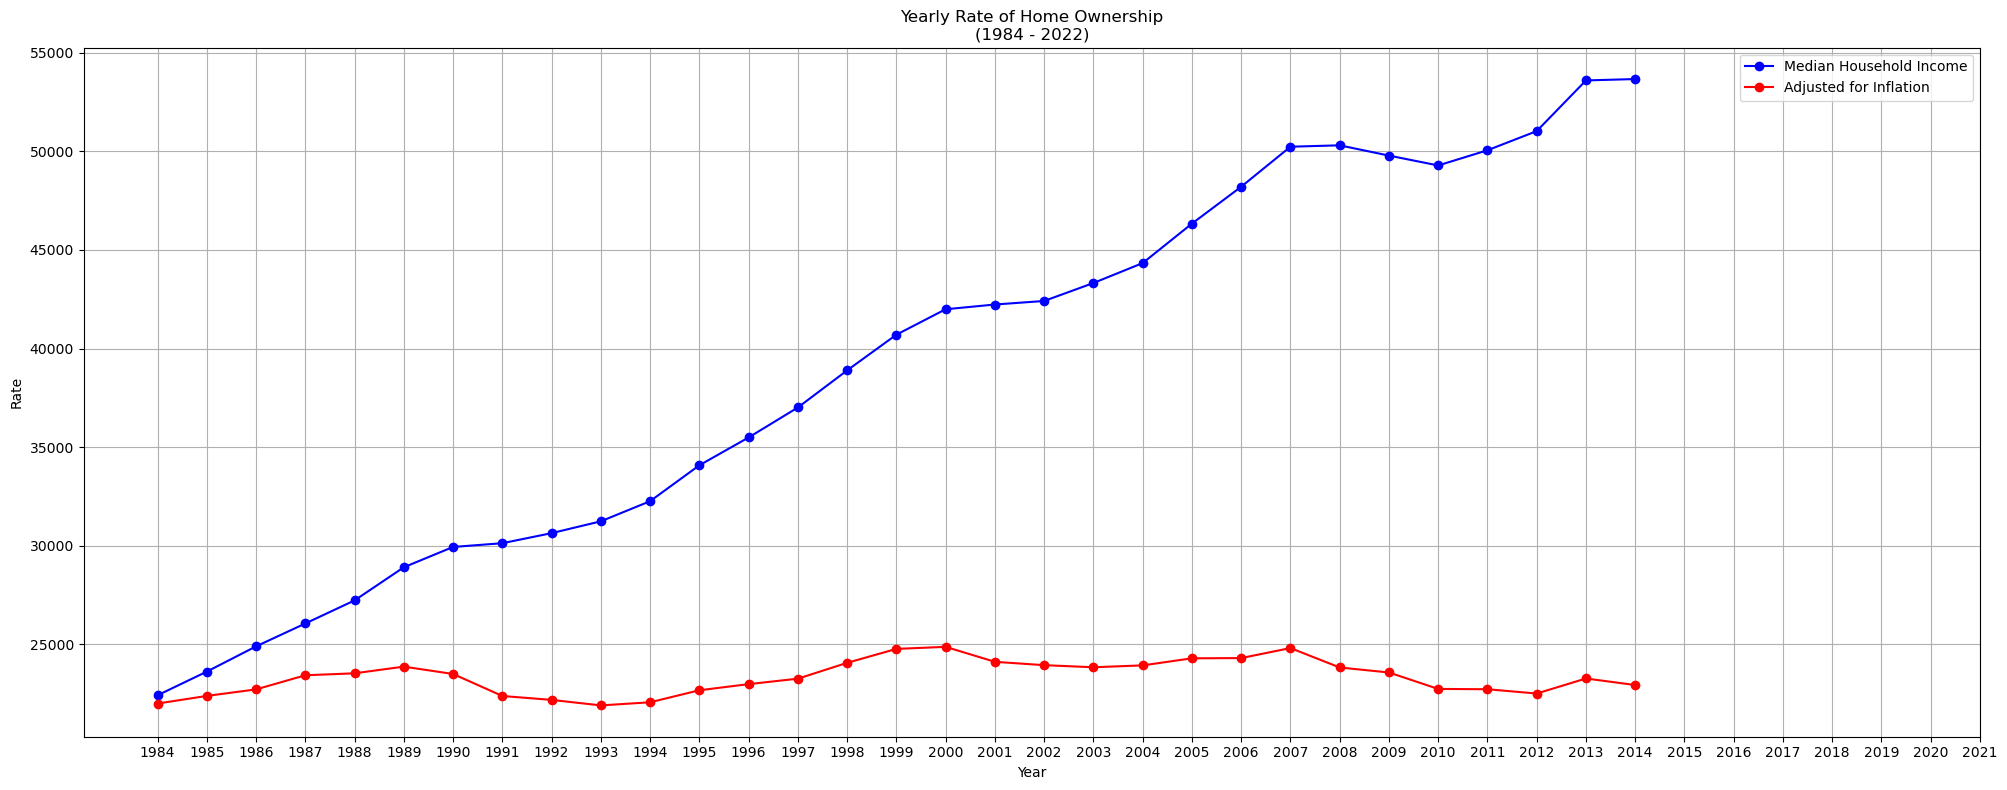

In [222]:
# Create filter for data
data_filter = (
      (economic_data_df["Median Household Income"]        != 0) \
    & (economic_data_df["Median Household Income (adj)"]  != 0)
  )
#display(economic_data_df[data_filter])

plt.figure(figsize=(20, 8))

plt.plot(
      pd.to_datetime(economic_data_df[data_filter]["Date"]).dt.year
    , economic_data_df[data_filter]["Median Household Income"]
    , marker    = "o"
    , linestyle = "-"
    , color     = "blue"
    , label     = "Median Household Income"
)
plt.plot(
      pd.to_datetime(economic_data_df[data_filter]["Date"]).dt.year
    , economic_data_df[data_filter]["Median Household Income (adj)"]
    , marker    = "o"
    , linestyle = "-"
    , color     = "red"
    , label     = "Adjusted for Inflation"
)

plt.title("Yearly Rate of Home Ownership\n(1984 - 2022)")
plt.xlabel("Year")
plt.ylabel("Rate")
plt.grid(True)
plt.tight_layout()
plt.xticks(np.arange(1984, 2022, 1))
plt.legend()
plt.show()

In [224]:
#display(avg_hourly_earnings_private_employees_monthly_df)  # 3/1/2006 - 12/1/2023
#display(personal_income_monthly_df)                        # 1/1/1946 - 11/1/2023
#display(employment_rate_monthly_df)                        # 1/1/1946 - 12/1/2023
#display(mortgage_rate_30_year_monthly_df)                  # 4/1/1971 - 1/1/2024
#display(mortgage_rate_15_year_monthly_df)                  # 8/1/1991 - 1/1/2024
#display(cpi_inflation_monthly_df)                          # 1/1/1913 - 1/1/2014
#display(rate_of_home_ownership_quarterly_df)               # 1/1/1965 - 7/1/2023
#display(median_sales_price_housing_quarterly_df)           # 1/1/1963 - 7/1/2023
#display(median_household_income_annually_df)               # 1/1/1984 - 1/1/2022
#display(house_price_index_quarterly_df)                    # 1/1/1975 - 7/1/2023

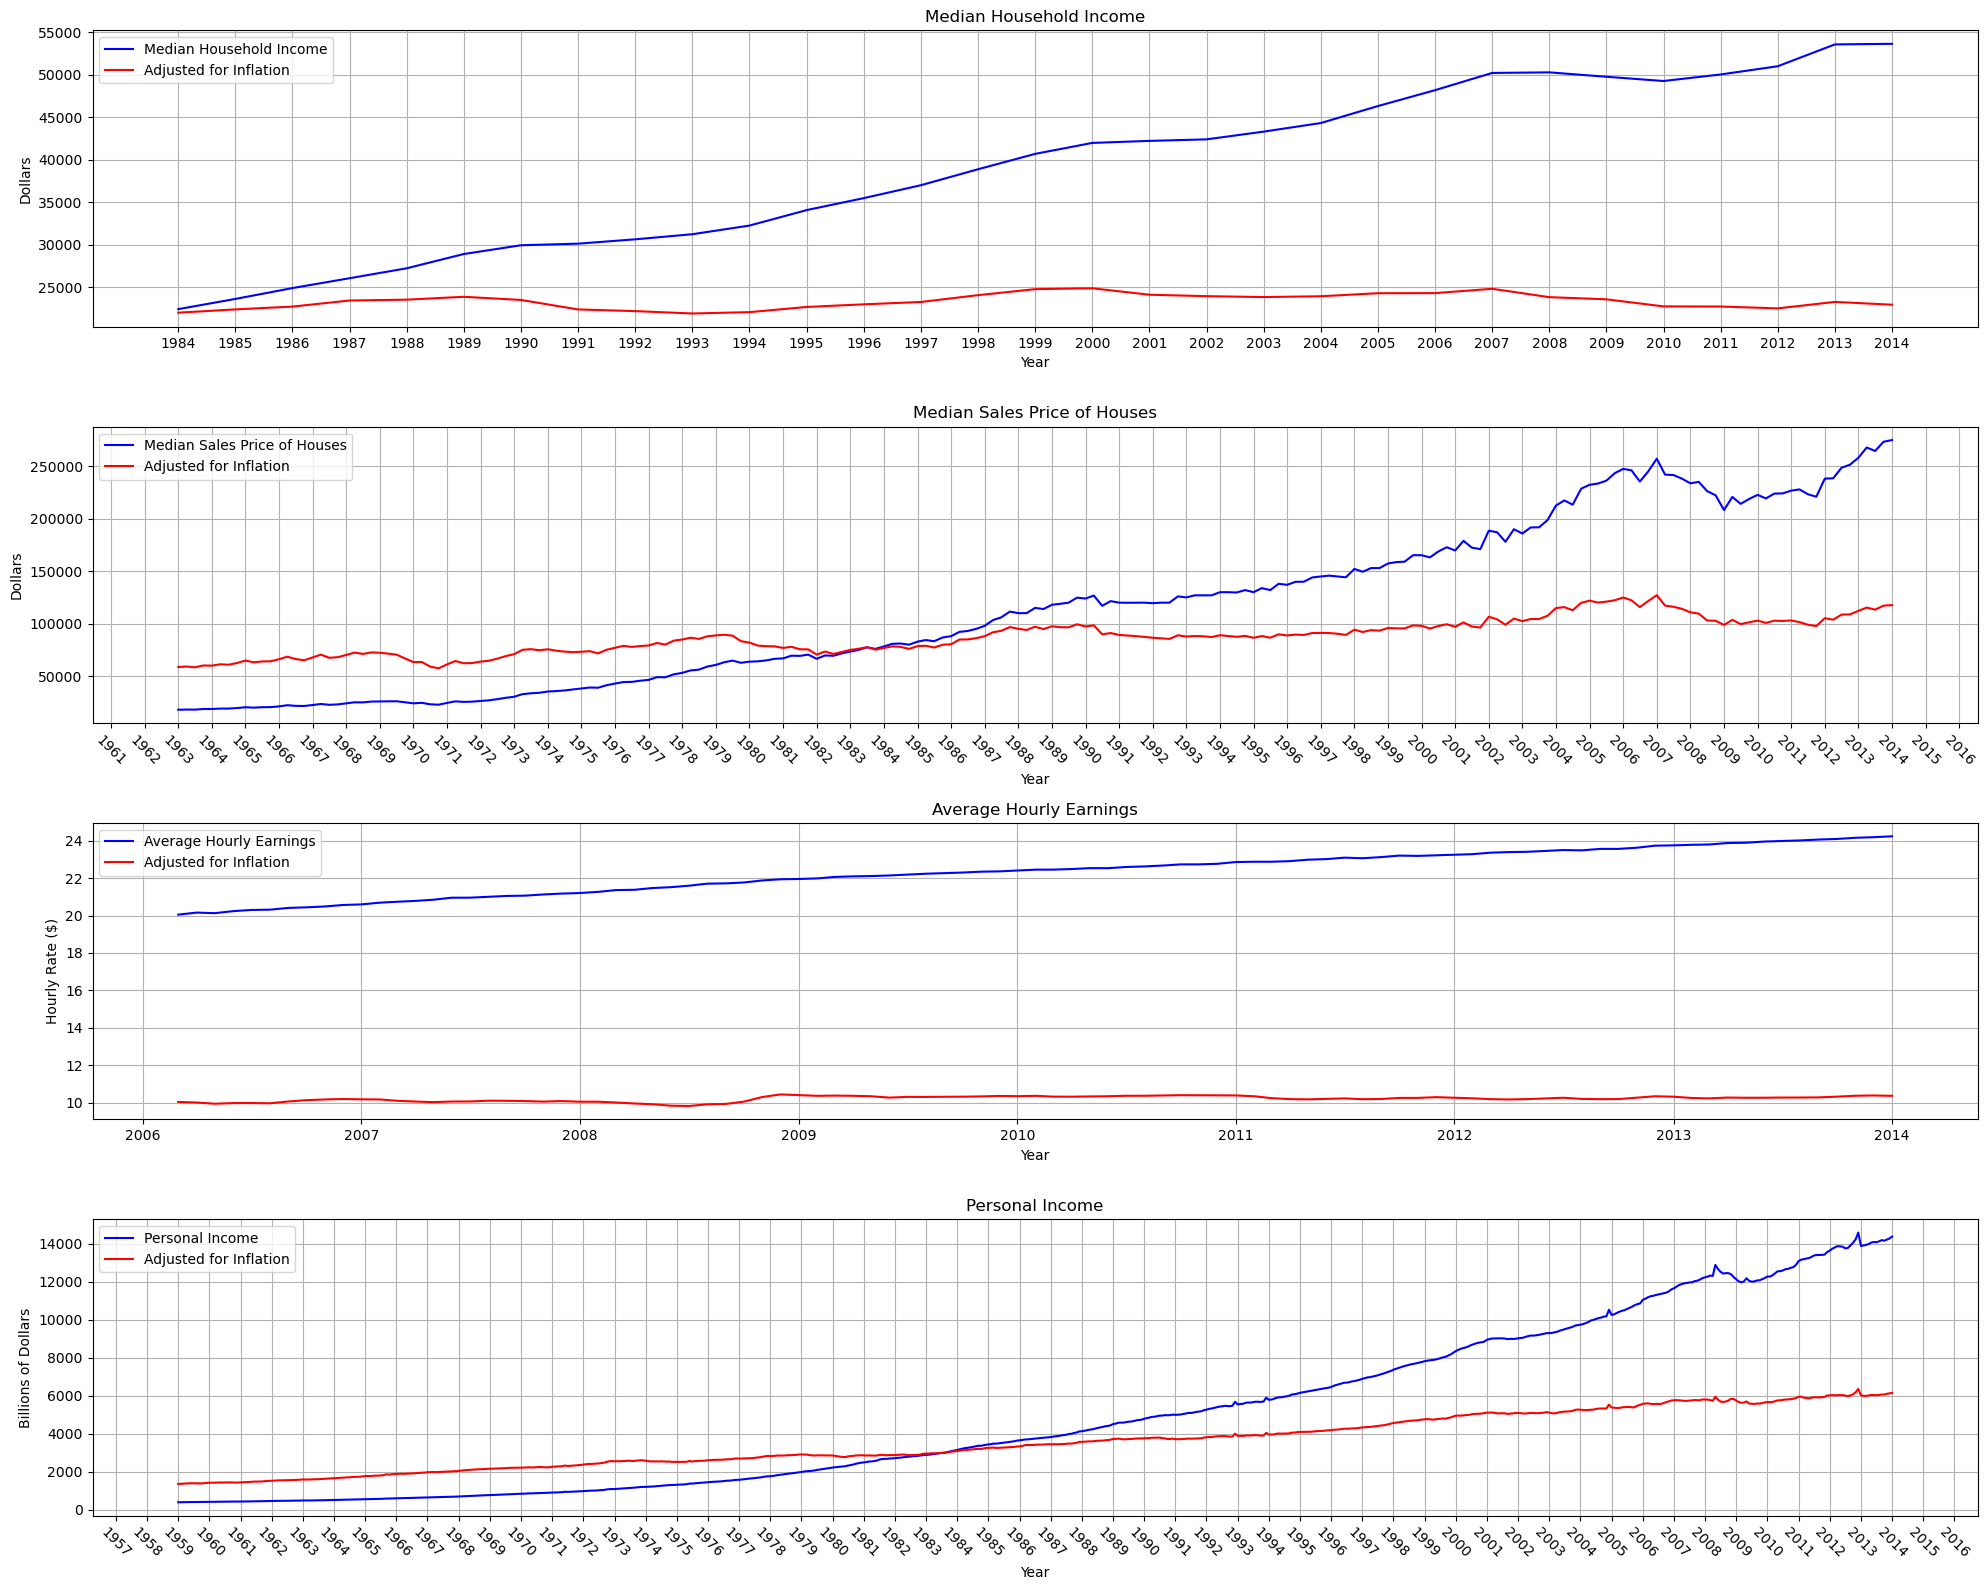

In [225]:
# Create filter for data
data_filter = (
      (economic_data_df["Median Household Income"]          != 0)
    & (economic_data_df["Median Household Income (adj)"]    != 0)
)

# Create a figure with four subplots arranged in 4 rows
fig, axes = plt.subplots(4, 1, figsize=(20, 16))

# Plot Median Household Income with Adjustment for Inflation in the first row
axes[0].plot(
      pd.to_datetime(economic_data_df[data_filter]["Date"]).dt.year
    , economic_data_df[data_filter]["Median Household Income"]
    , marker    = ""
    , linestyle = "-"
    , color     = "blue"
    , label     = "Median Household Income"
)
axes[0].plot(
      pd.to_datetime(economic_data_df[data_filter]["Date"]).dt.year
    , economic_data_df[data_filter]["Median Household Income (adj)"]
    , marker    = ""
    , linestyle = "-"
    , color     = "red"
    , label     = "Adjusted for Inflation"
)

axes[0].set_title("Median Household Income")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Dollars")
axes[0].grid(True)
axes[0].set_xticks(np.arange(1984, 2015, 1))
axes[0].legend()

# Plot Median Sales Price of Houses with Adjustment for Inflation in the second row
data_filter = (
      (economic_data_df["Median Sales Price of Houses"]       != 0)
    & (economic_data_df["Median Sales Price of Houses (adj)"] != 0)
)

axes[1].plot(
      economic_data_df[data_filter]["Date"]
    , economic_data_df[data_filter]["Median Sales Price of Houses"]
    , marker    = ""
    , linestyle = "-"
    , color     = "blue"
    , label     = "Median Sales Price of Houses"
)
axes[1].plot(
      economic_data_df[data_filter]["Date"]
    , economic_data_df[data_filter]["Median Sales Price of Houses (adj)"]
    , marker    = ""
    , linestyle = "-"
    , color     = "red"
    , label     = "Adjusted for Inflation"
)
axes[1].set_title("Median Sales Price of Houses")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Dollars")
axes[1].grid(True)
axes[1].xaxis.set_major_locator(YearLocator())
axes[1].xaxis.set_major_formatter(DateFormatter("%Y"))
axes[1].tick_params(axis='x', rotation=-45)
axes[1].legend()

# Plot Average Hourly Earnings with Adjustment for Inflation in the third row
data_filter = (
      (economic_data_df["Average Hourly Earnings"]       != 0)
    & (economic_data_df["Average Hourly Earnings (adj)"] != 0)
)

axes[2].plot(
      economic_data_df[data_filter]["Date"]
    , economic_data_df[data_filter]["Average Hourly Earnings"]
    , marker    = ""
    , linestyle = "-"
    , color     = "blue"
    , label     = "Average Hourly Earnings"
)
axes[2].plot(
      economic_data_df[data_filter]["Date"]
    , economic_data_df[data_filter]["Average Hourly Earnings (adj)"]
    , marker    = ""
    , linestyle = "-"
    , color     = "red"
    , label     = "Adjusted for Inflation"
)
axes[2].set_title("Average Hourly Earnings")
axes[2].set_xlabel("Year")
axes[2].set_ylabel("Hourly Rate ($)")
axes[2].grid(True)
axes[2].xaxis.set_major_locator(YearLocator())
axes[2].xaxis.set_major_formatter(DateFormatter("%Y"))
#axes[2].tick_params(axis='x', rotation=-45)
axes[2].legend()

# Plot Personal Income with Adjustment for Inflation in the fourth row
data_filter = (
      (economic_data_df["Personal Income"]       != 0)
    & (economic_data_df["Personal Income (adj)"] != 0)
)

axes[3].plot(
      economic_data_df[data_filter]["Date"]
    , economic_data_df[data_filter]["Personal Income"]
    , marker    = ""
    , linestyle = "-"
    , color     = "blue"
    , label     = "Personal Income"
)
axes[3].plot(
      economic_data_df[data_filter]["Date"]
    , economic_data_df[data_filter]["Personal Income (adj)"]
    , marker    = ""
    , linestyle = "-"
    , color     = "red"
    , label     = "Adjusted for Inflation"
)
axes[3].set_title("Personal Income")
axes[3].set_xlabel("Year")
axes[3].set_ylabel("Billions of Dollars")
axes[3].grid(True)
axes[3].xaxis.set_major_locator(YearLocator())
axes[3].xaxis.set_major_formatter(DateFormatter("%Y"))
axes[3].tick_params(axis='x', rotation=-45)
axes[3].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure with four subplots
plt.show()

In [158]:
#  Column No.   Label
#  0            Date
#  1            Average Hourly Earnings
#  2            Personal Income
#  3            Employment Rate
#  4            30-Year Fixed Rate Mortgage Avg.
#  5            15-Year Fixed Rate Mortgage Avg.
#  6            CPI
#  7            Inflation
#  8            Rate of Home Ownership
#  9            Median Sales Price of Houses
# 10            HPI
# 11            Median Household Income
# 12            House Price to Income Ratio
# 13            Year
# 14            Quarter
# 15            Average Hourly Earnings (adj)
# 16            Personal Income (adj)
# 17            Median Sales Price of Houses (adj)
# 18            Median Household Income (adj)

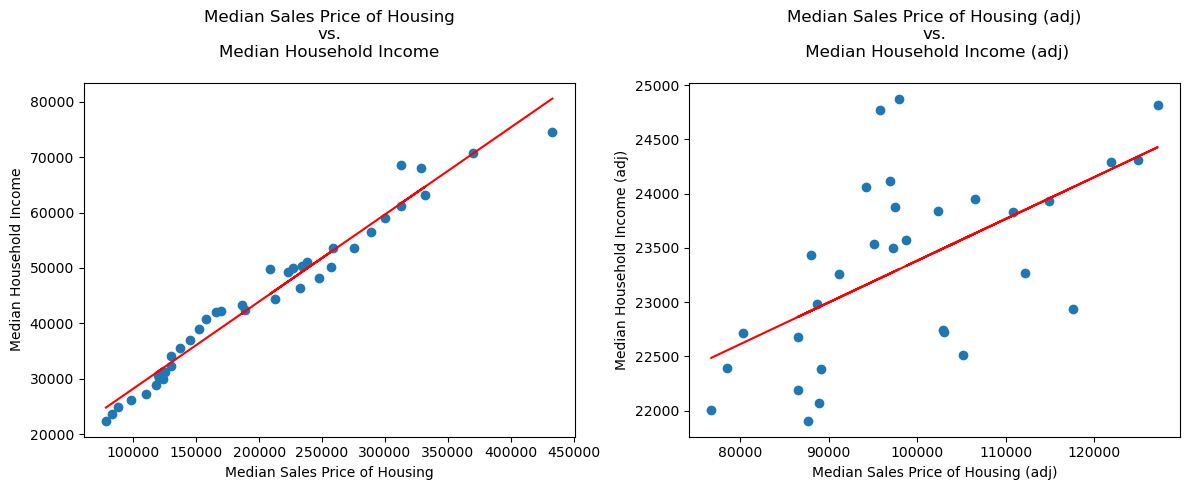

In [187]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

econ_data_filtered_df = economic_data_df[(economic_data_df["Median Sales Price of Houses"] != 0) & (economic_data_df["Median Household Income"] != 0)]
x_values = econ_data_filtered_df["Median Sales Price of Houses"]
y_values = econ_data_filtered_df["Median Household Income"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

axes[0].scatter(x_values, y_values)
axes[0].set_xlabel("Median Sales Price of Housing")
axes[0].set_ylabel("Median Household Income")
axes[0].set_title(f"Median Sales Price of Housing\nvs.\nMedian Household Income\n")
#axes[0].grid(True)
axes[0].plot(x_values, regress_values, "r-")

econ_data_filtered_df = economic_data_df[(economic_data_df["Median Sales Price of Houses (adj)"] != 0) & (economic_data_df["Median Household Income (adj)"] != 0)]
x_values = econ_data_filtered_df["Median Sales Price of Houses (adj)"]
y_values = econ_data_filtered_df["Median Household Income (adj)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

axes[1].scatter(x_values, y_values)
axes[1].set_xlabel("Median Sales Price of Housing (adj)")
axes[1].set_ylabel("Median Household Income (adj)")
axes[1].set_title(f"Median Sales Price of Housing (adj)\nvs.\n Median Household Income (adj)\n")
#axes[1].grid(True)
axes[1].plot(x_values, regress_values, "r-")


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

House Price to Income Ration / Indeces Comparisons

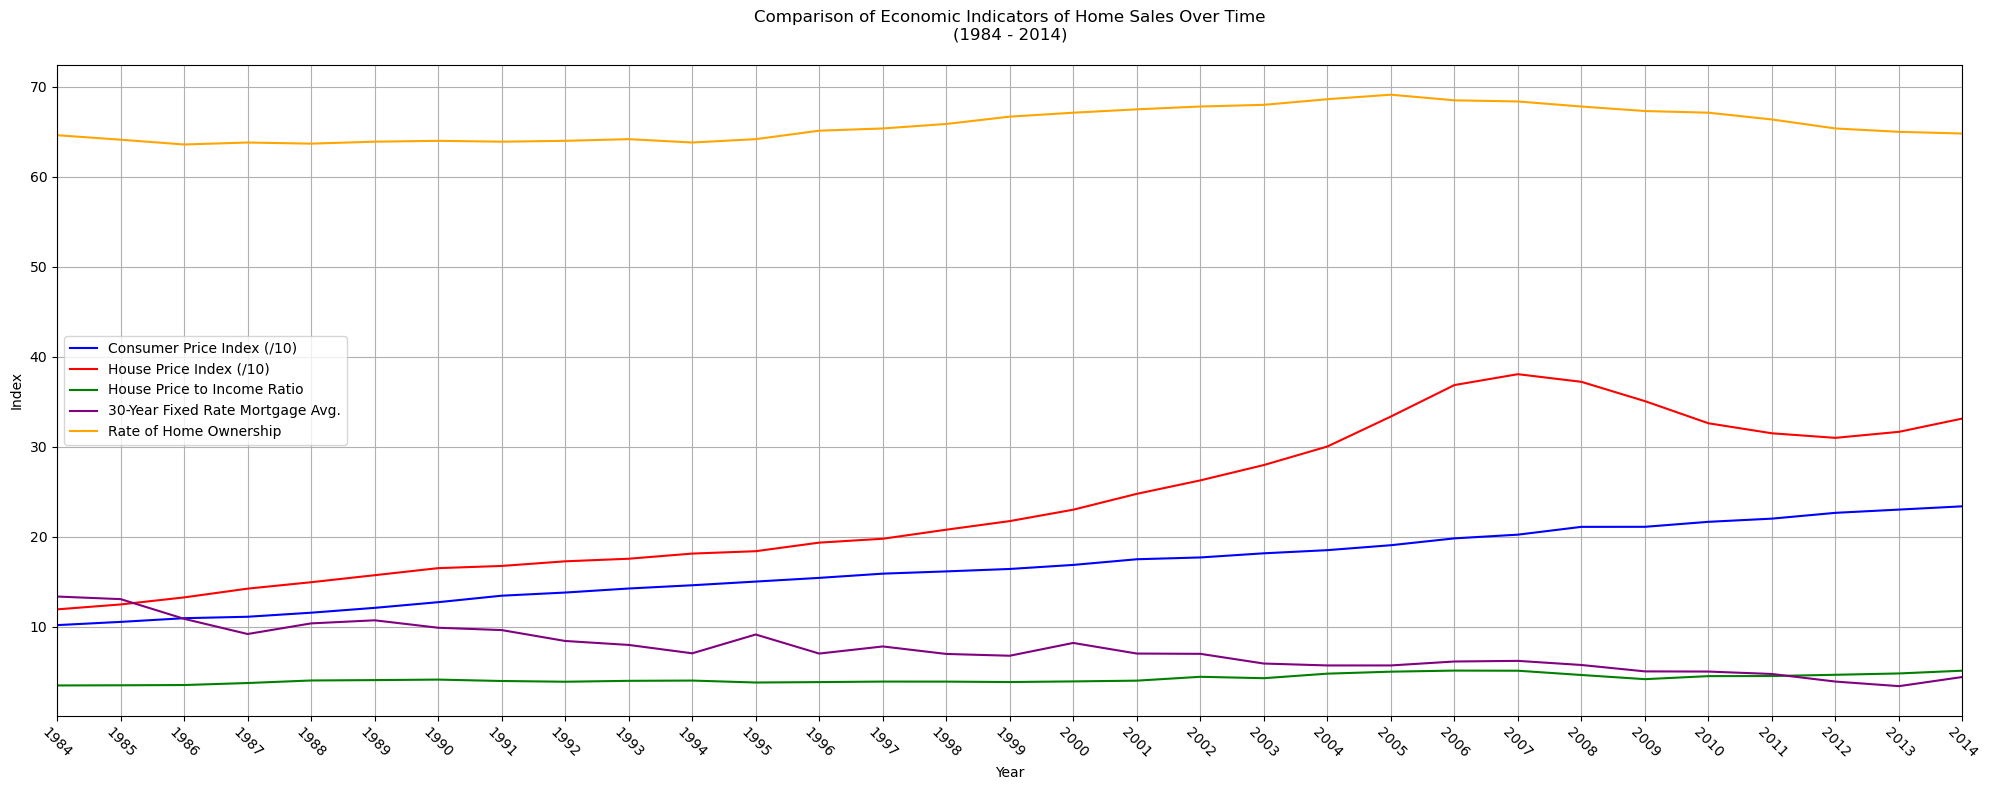

In [269]:
# Create filter for data
data_filter = (
      (economic_data_df["CPI"]                          != 0)
    & (economic_data_df["HPI"]                          != 0)
    & (economic_data_df["House Price to Income Ratio"]  != 0)
)

plt.figure(figsize=(20, 8))
plt.plot(
      pd.to_datetime(economic_data_df[data_filter]["Date"])
    , economic_data_df[data_filter]["CPI"]/10
    , marker    = ""
    , linestyle = "-"
    , color     = "blue"
    , label     = "Consumer Price Index (/10)"
)
plt.plot(
      pd.to_datetime(economic_data_df[data_filter]["Date"])
    , economic_data_df[data_filter]["HPI"]/10
    , marker    = ""
    , linestyle = "-"
    , color     = "red"
    , label     = "House Price Index (/10)"
)
plt.plot(
      pd.to_datetime(economic_data_df[data_filter]["Date"])
    , economic_data_df[data_filter]["House Price to Income Ratio"]
    , marker    = ""
    , linestyle = "-"
    , color     = "green"
    , label     = "House Price to Income Ratio"
)
plt.plot(
      pd.to_datetime(economic_data_df[data_filter]["Date"])
    , economic_data_df[data_filter]["30-Year Fixed Rate Mortgage Avg."]
    , marker    = ""
    , linestyle = "-"
    , color     = "purple"
    , label     = "30-Year Fixed Rate Mortgage Avg."
)
plt.plot(
      pd.to_datetime(economic_data_df[data_filter]["Date"])
    , economic_data_df[data_filter]["Rate of Home Ownership"]
    , marker    = ""
    , linestyle = "-"
    , color     = "orange"
    , label     = "Rate of Home Ownership"
)

plt.title("Comparison of Economic Indicators of Home Sales Over Time\n(1984 - 2014)\n")
plt.xlabel("Year")
plt.ylabel("Index")
plt.grid(True)
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter("%Y"))
plt.tick_params(axis='x', rotation=-45)
plt.xlim(economic_data_df[data_filter]['Date'].min(), economic_data_df[data_filter]['Date'].max())

plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

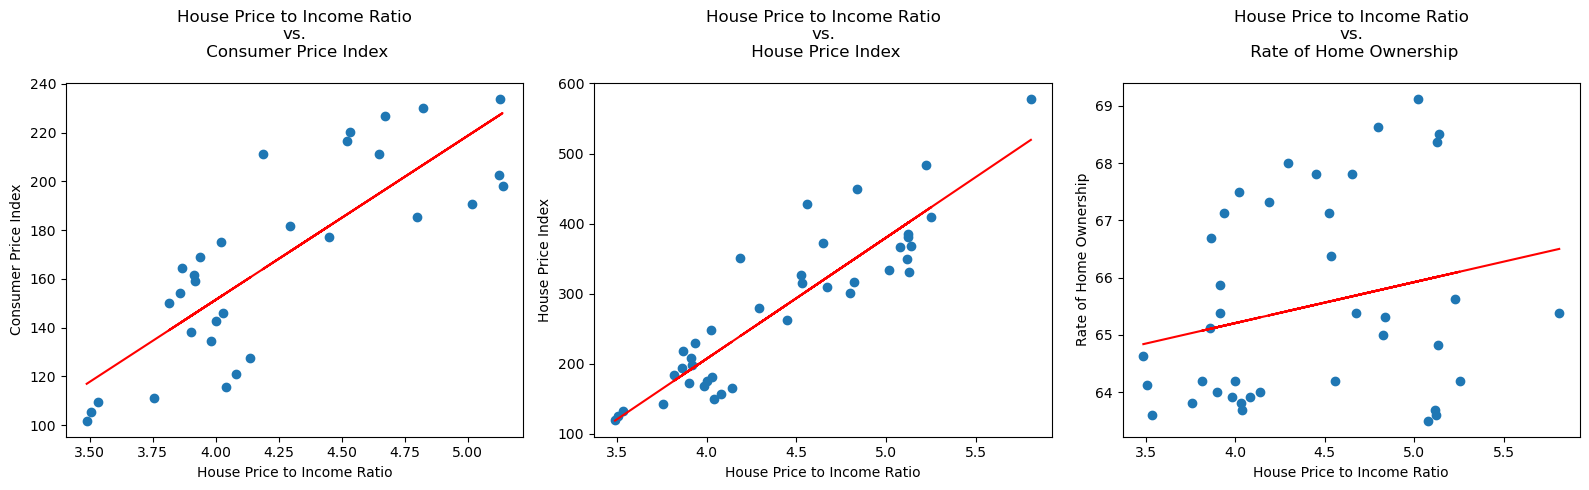

In [251]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))  # 1 row, 2 columns
 
econ_data_filtered_df = economic_data_df[
      (economic_data_df["House Price to Income Ratio"]  != 0) 
    & (economic_data_df["CPI"]                          != 0)
]
x_values = econ_data_filtered_df["House Price to Income Ratio"]
y_values = econ_data_filtered_df["CPI"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

axes[0].scatter(x_values, y_values)
axes[0].set_xlabel("House Price to Income Ratio")
axes[0].set_ylabel("Consumer Price Index")
axes[0].set_title(f"House Price to Income Ratio\nvs.\n Consumer Price Index\n")
#axes[0].grid(True)
axes[0].plot(x_values, regress_values, "r-")

econ_data_filtered_df = economic_data_df[
      (economic_data_df["House Price to Income Ratio"]  != 0) 
    & (economic_data_df["HPI"]                          != 0)
]
x_values = econ_data_filtered_df["House Price to Income Ratio"]
y_values = econ_data_filtered_df["HPI"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

axes[1].scatter(x_values, y_values)
axes[1].set_xlabel("House Price to Income Ratio")
axes[1].set_ylabel("House Price Index")
axes[1].set_title(f"House Price to Income Ratio\nvs.\n House Price Index\n")
#axes[1].grid(True)
axes[1].plot(x_values, regress_values, "r-")

econ_data_filtered_df = economic_data_df[
      (economic_data_df["House Price to Income Ratio"]  != 0) 
    & (economic_data_df["Rate of Home Ownership"]       != 0)
]
x_values = econ_data_filtered_df["House Price to Income Ratio"]
y_values = econ_data_filtered_df["Rate of Home Ownership"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

axes[2].scatter(x_values, y_values)
axes[2].set_xlabel("House Price to Income Ratio")
axes[2].set_ylabel("Rate of Home Ownership")
axes[2].set_title(f"House Price to Income Ratio\nvs.\n Rate of Home Ownership\n")
#axes[2].grid(True)
axes[2].plot(x_values, regress_values, "r-")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Mortgage Rate Analysis

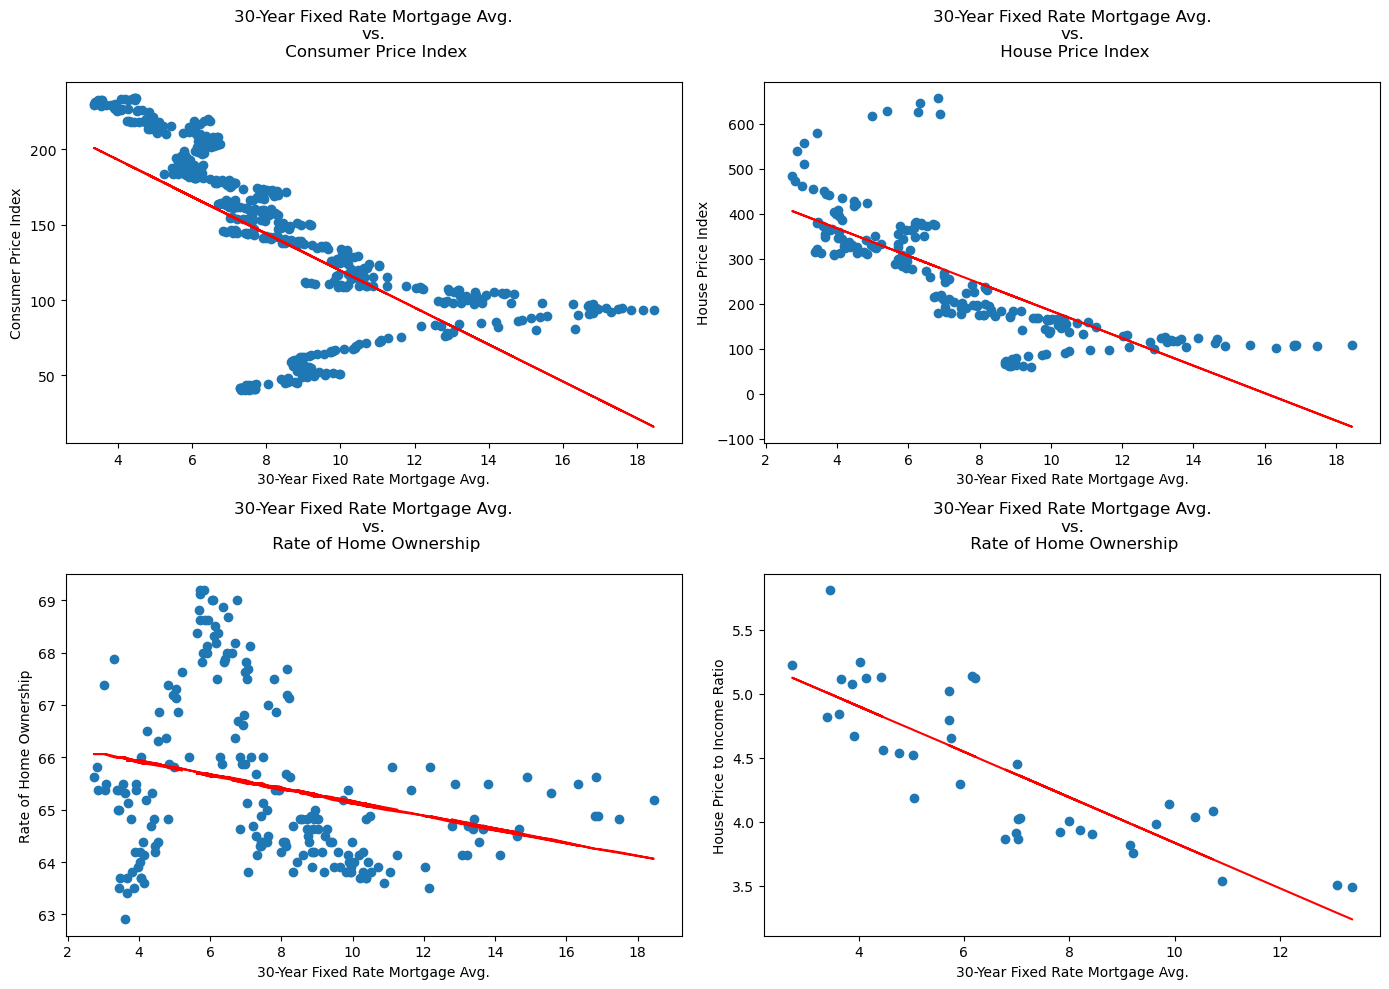

In [276]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows, 2 columns
 
econ_data_filtered_df = economic_data_df[
      (economic_data_df["30-Year Fixed Rate Mortgage Avg."] != 0) 
    & (economic_data_df["CPI"]                              != 0)
]
x_values = econ_data_filtered_df["30-Year Fixed Rate Mortgage Avg."]
y_values = econ_data_filtered_df["CPI"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

axes[0, 0].scatter(x_values, y_values)
axes[0, 0].set_xlabel("30-Year Fixed Rate Mortgage Avg.")
axes[0, 0].set_ylabel("Consumer Price Index")
axes[0, 0].set_title(f"30-Year Fixed Rate Mortgage Avg.\nvs.\n Consumer Price Index\n")
axes[0, 0].plot(x_values, regress_values, "r-")

econ_data_filtered_df = economic_data_df[
      (economic_data_df["30-Year Fixed Rate Mortgage Avg."] != 0) 
    & (economic_data_df["HPI"]                              != 0)
]
x_values = econ_data_filtered_df["30-Year Fixed Rate Mortgage Avg."]
y_values = econ_data_filtered_df["HPI"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

axes[0, 1].scatter(x_values, y_values)
axes[0, 1].set_xlabel("30-Year Fixed Rate Mortgage Avg.")
axes[0, 1].set_ylabel("House Price Index")
axes[0, 1].set_title(f"30-Year Fixed Rate Mortgage Avg.\nvs.\n House Price Index\n")
axes[0, 1].plot(x_values, regress_values, "r-")

econ_data_filtered_df = economic_data_df[
      (economic_data_df["30-Year Fixed Rate Mortgage Avg."] != 0) 
    & (economic_data_df["Rate of Home Ownership"]           != 0)
]
x_values = econ_data_filtered_df["30-Year Fixed Rate Mortgage Avg."]
y_values = econ_data_filtered_df["Rate of Home Ownership"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

axes[1, 0].scatter(x_values, y_values)
axes[1, 0].set_xlabel("30-Year Fixed Rate Mortgage Avg.")
axes[1, 0].set_ylabel("Rate of Home Ownership")
axes[1, 0].set_title(f"30-Year Fixed Rate Mortgage Avg.\nvs.\n Rate of Home Ownership\n")
axes[1, 0].plot(x_values, regress_values, "r-")


econ_data_filtered_df = economic_data_df[
      (economic_data_df["30-Year Fixed Rate Mortgage Avg."] != 0) 
    & (economic_data_df["House Price to Income Ratio"]           != 0)
]
x_values = econ_data_filtered_df["30-Year Fixed Rate Mortgage Avg."]
y_values = econ_data_filtered_df["House Price to Income Ratio"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

axes[1, 1].scatter(x_values, y_values)
axes[1, 1].set_xlabel("30-Year Fixed Rate Mortgage Avg.")
axes[1, 1].set_ylabel("House Price to Income Ratio")
axes[1, 1].set_title(f"30-Year Fixed Rate Mortgage Avg.\nvs.\n Rate of Home Ownership\n")
axes[1, 1].plot(x_values, regress_values, "r-")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()